In [68]:
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import f21_predict_base as base
import plot_results as pltr
import importlib
import logging
import numpy as np
import F21DataLoader as dl
import F21Stats as f21stats
importlib.reload(base)
importlib.reload(dl)
importlib.reload(f21stats)


def load_dataset(datafiles, psbatchsize=100, ps_bins=None, limitsamplesize=None, use_new_ps_calc=False):
    # Create processor with desired number of worker threads
    processor = dl.F21DataLoader(max_workers=1, psbatchsize=psbatchsize, skip_ps=False, ps_bins=None, limitsamplesize=limitsamplesize, scale_ps=True, use_new_ps_calc=use_new_ps_calc, ps_log_bins=True)#, limitsamplesize=4)
        
    # Process all files and get results 
    results = processor.process_all_files(datafiles)
        
    # Access results
    #print(f'{results.keys()}')
    all_ks = results['ks']
    all_los = results['los']
    all_freq = results['freq_axis']
    all_ps = results['ps']

    #print(f"all_los.shape={all_los.shape}, all_ps.shape={all_ps.shape}, all_ks.shape={all_ks.shape}")
    #all_ps, all_ks = calculate_dimensionless_power_spectrum(all_los, all_freq[0])
    #print(f"all_los.shape={all_los.shape}, all_ps.shape={all_ps.shape}, all_ks.shape={all_ks.shape}")

    ps_std = results['ps_std']
    #ps_plus_std = all_ps + ps_std
    #ps_minus_std = all_ps - ps_std
    all_params = results['params']
    #plot_los(all_ps[0], freq_axis)
    """
    print(f"sample ks:{all_ks[0]}")
    print(f"sample ps:{all_ps[0,:]}")
    print(f"sample params:{all_params[0]}")
    print(f"sample los:{all_los[0]}")
    print(f"sample freq:{all_freq}")
    """
    #base.plot_los(all_los[:1], all_freq[0,:], showplots=True, saveplots = False, label=f"{all_params[0]}")
    #base.plot_power_spectra(all_ps[:1], all_ks[:1], all_params[:1], showplots=True, saveplots = False, label=f"{all_params[0]}")

    print(f"\Loaded LoS data shape: {all_los.shape}")
    print(f"Loaded data: parameters shape: {all_params.shape}")
    return (all_params, all_freq, all_los, all_ps, all_ks, ps_std)

colorlabels=[r'$\langle x_{HI}\rangle$', r'$log_{10}(f_X)$']
colormaps=[plt.cm.viridis_r, plt.cm.viridis_r]

def plot_power_spectra(ps, psstd, ks, params, psn=None, colorind=1, output_dir=".", showplots=False, saveplots=True, label="", scale='log', markers=False):
    #logger.info(f'shapes ps:{ps.shape} ks:{ks.shape}')
    base.initplt()
    plt.rcParams['figure.figsize'] = [6., 5.]

    fig, ax = plt.subplots(nrows=1, ncols=1) 

    # plot the noise
    if psn is not None: 
        #for i in range(psn.shape[0]):
        #    ax.scatter(ks[0,1:]*1e6, psn[i, 1:], c='red',alpha=0.1)
        # Calculate mean and standard deviation of psn
        psn_mean = np.mean(psn[:,1:], axis=0)
        psn_std = np.std(psn[:,1:], axis=0)

        # Plot the mean as a dotted red line
        ax.plot(ks[1:]*1e6, psn_mean, color='red', linestyle='--', alpha=1, label='Noise')

        # Add the shaded region for 1 standard deviation
        ax.fill_between(ks[1:] * 1e6, psn_mean - psn_std, psn_mean + psn_std, color='red', alpha=0.3, label='Noise 1 Std Dev')
        #ax.fill_between(ks * 1e6, psn_mean - 2*psn_std, psn_mean + 2*psn_std, color='red', alpha=0.1, label='Noise 2 Std Dev')

    alpha = base.decide_alpha(len(ps))
    logging.info(params[0:2])
    coloraxs = params[:,colorind]
    mincoloraxs = min(coloraxs)
    maxcoloraxs = max(coloraxs)
    print(f"min-max range: {mincoloraxs}-{maxcoloraxs}")
    if markers: marker='o' 
    else: marker = None

    sm = plt.cm.ScalarMappable(cmap=colormaps[colorind], norm=clr.Normalize(vmin=mincoloraxs, vmax=maxcoloraxs))

    cbar = plt.colorbar(sm, ax=ax, label=colorlabels[colorind])

    plt.title(label)    
    if scale == 'log': 
        ax.set_xscale('log')
        ax.set_yscale('log')

    for i, (row_ps, row_psstd, row_coloraxs) in enumerate(zip(ps, psstd, coloraxs)):
        color=sm.to_rgba(row_coloraxs)
        #if i%1000==0: print(f"color mapping: {row_coloraxs} : {color}")
        ax.plot(ks*1e6, row_ps, linewidth=0.5, color=color, alpha=alpha, marker= marker)
        ax.fill_between(ks * 1e6, row_ps - row_psstd, row_ps + row_psstd, color=color, alpha=0.3)
        #ax.set_yscale('log')
        #if i> 10: break
        # Plot noise curve

    #plt.legend()
    plt.xlabel(r"$k$ [MHz$^{-1}$]")
    plt.ylabel("$kP_{21}$")
    plt.xlim(left=0.3)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    if saveplots: plt.savefig(f"{output_dir}/power_spectra_{label}.pdf", format="pdf", bbox_inches='tight')
    if showplots: plt.show()
    plt.close()


<>:48: SyntaxWarning: invalid escape sequence '\L'
<>:48: SyntaxWarning: invalid escape sequence '\L'
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_63908/3040124322.py:48: SyntaxWarning: invalid escape sequence '\L'
  print(f"\Loaded LoS data shape: {all_los.shape}")


min-max range: 0.0-1.0


<Figure size 500x500 with 0 Axes>

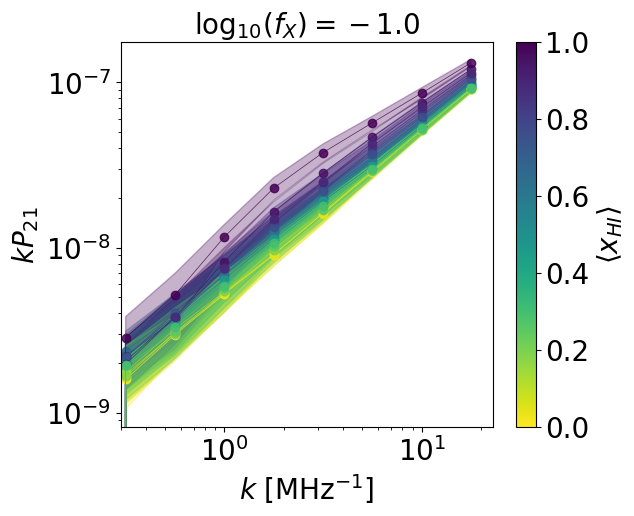

In [69]:
import glob
import numpy as np

filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"

files10 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps10 = np.zeros((len(files10), 32))
ps10std = np.zeros((len(files10), 32))
params = np.zeros((len(files10), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")

for i, file in enumerate(files10):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params[i][0] = currxHI
    params[i][1] = -1.0
    currps = np.loadtxt(file)
    currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps10[i, :] = currps_mean
    ps10std[i, :] = currps_std


plot_power_spectra(ps10[:,:10], ps10std[:,:10], ks[:10], params, colorind=0, showplots=True, saveplots=True, label=r"log$_{10}(f_X)=-1.0$", markers=True, output_dir='tmp_out')
#plot_power_spectra(ps10[:,16:24], ps10std[:,16:24], ks[16:24], params, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=-1.0 Mean and Std for different xHI", markers=True)


min-max range: 0.0-0.97


<Figure size 500x500 with 0 Axes>

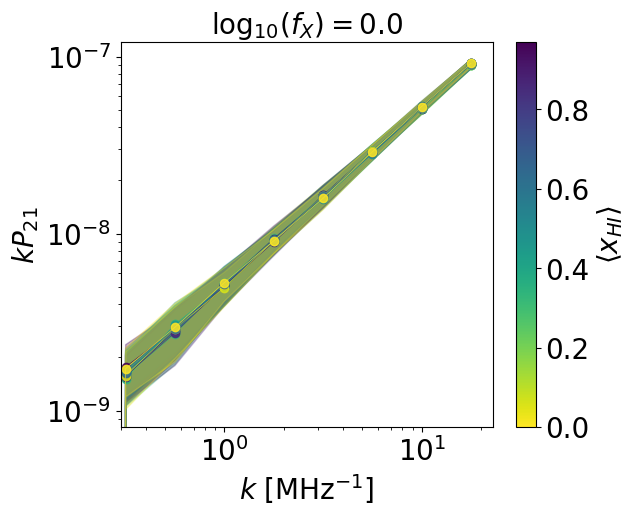

In [70]:
import glob
import numpy as np

filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"

files10 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX0.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps10 = np.zeros((len(files10), 32))
ps10std = np.zeros((len(files10), 32))
params = np.zeros((len(files10), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")

for i, file in enumerate(files10):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params[i][0] = currxHI
    params[i][1] = -1.0
    currps = np.loadtxt(file)
    currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps10[i, :] = currps_mean
    ps10std[i, :] = currps_std


plot_power_spectra(ps10[:,:10], ps10std[:,:10], ks[:10], params, colorind=0, showplots=True, saveplots=True, label=r"log$_{10}(f_X)=0.0$", markers=True, output_dir='tmp_out')
#plot_power_spectra(ps10[:,16:24], ps10std[:,16:24], ks[16:24], params, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=-1.0 Mean and Std for different xHI", markers=True)


min-max range: 0.0-1.0


<Figure size 500x500 with 0 Axes>

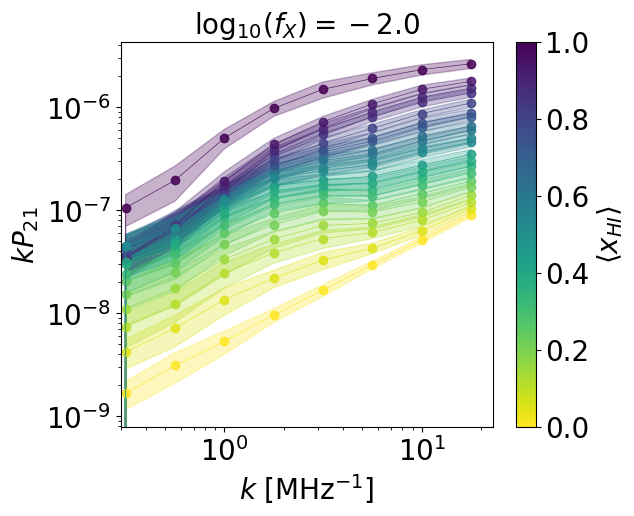

In [71]:
import glob
import numpy as np

filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"

files10 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps10 = np.zeros((len(files10), 32))
ps10std = np.zeros((len(files10), 32))
params = np.zeros((len(files10), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")

for i, file in enumerate(files10):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params[i][0] = currxHI
    params[i][1] = -1.0
    currps = np.loadtxt(file)
    currps = currps * ks * 1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps10[i, :] = currps_mean
    ps10std[i, :] = currps_std


plot_power_spectra(ps10[:,:10], ps10std[:,:10], ks[:10], params, colorind=0, showplots=True, saveplots=True, label=r"log$_{10}(f_X)=-2.0$", markers=True, output_dir='tmp_out')
#plot_power_spectra(ps10[:,16:24], ps10std[:,16:24], ks[16:24], params, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=-1.0 Mean and Std for different xHI", markers=True)


\Loaded LoS data shape: (1, 2762)
Loaded data: parameters shape: (1, 2)
files to load: 21
\Loaded LoS data shape: (21, 2762)
Loaded data: parameters shape: (21, 2)
min-max range: 0.004162702709436417-0.9957664012908936


<Figure size 500x500 with 0 Axes>

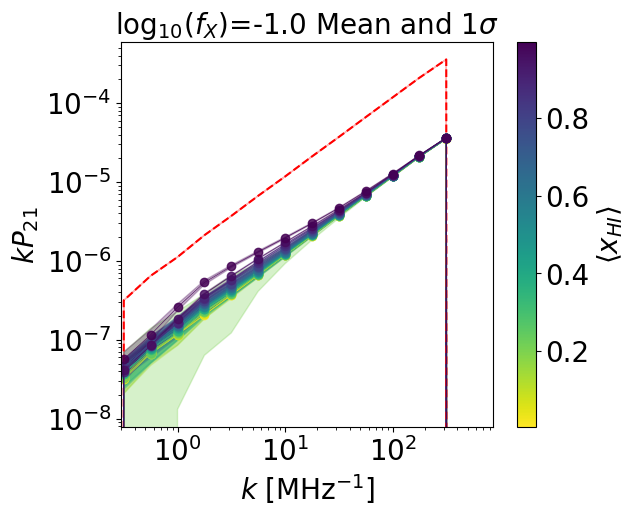

In [72]:
import glob
import numpy as np

filepath = "saved_output/train_test_psbs_dump/noisy_g50/f21_ps_dum_train_test_uGMRT_t50.0_20250410153928/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"
(paramsn, freqn, losn, psn, ksn, psn_std) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noiseonly_21cmFAST_200Mpc_z6.0_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1000, limitsamplesize=None)
files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h*.dat")

files10sn = sorted(files10sn)
print(f"files to load: {len(files10sn)}")

(params, freq, los, ps10, ks, p10_std) = load_dataset(files10sn, psbatchsize=1000, limitsamplesize=None)
plot_power_spectra(ps10[:,:16], ps10std[:,:16], ks[0], params, psn, colorind=0, showplots=True, saveplots=False, label=r"log$_{10}(f_X)$=-1.0 Mean and 1$\sigma$", markers=True)


min-max range: 0.0-1.0


<Figure size 500x500 with 0 Axes>

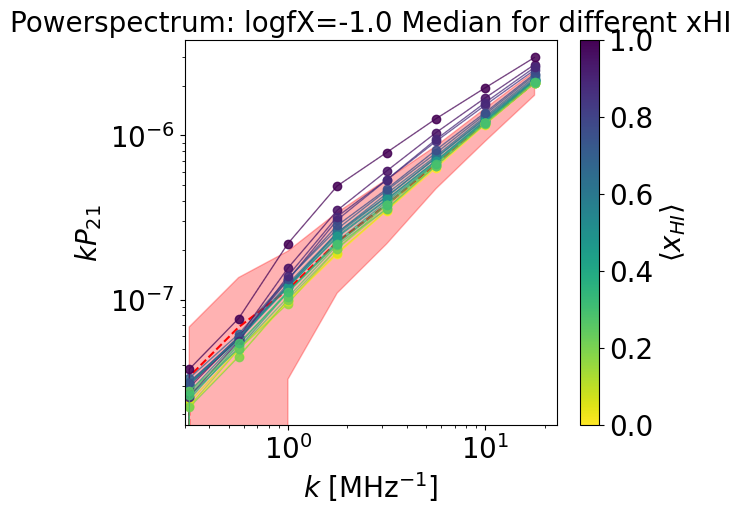

min-max range: 0.0-1.0


<Figure size 500x500 with 0 Axes>

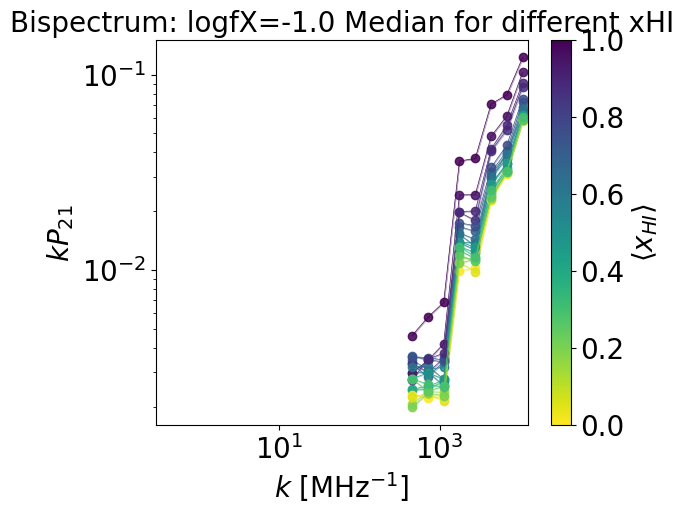

In [73]:
import glob
import numpy as np

filepath = "saved_output/train_test_psbs_dump/noisy_median/f21_ps_dum_train_test_uGMRT_t500.0_20250401163347" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"

files10 = glob.glob(f"{filepath}/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps10 = np.zeros((len(files10), 32))
ps10std = np.zeros((len(files10), 32))
params = np.zeros((len(files10), 2))
ks = np.loadtxt(f"{filepath}/ps/ks_bin.csv")

for i, file in enumerate(files10):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params[i][0] = currxHI
    params[i][1] = -1.0
    currps = np.loadtxt(file).reshape(-1,32)
    currps = currps
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps10[i, :] = currps_mean
    ps10std[i, :] = currps_std

files0111 = glob.glob(f"{filepath}/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps0111 = np.loadtxt(files0111[0])
plot_power_spectra(ps10[:,:10], ps10std[:,:10], ks[:10], params, ps0111[:,:10], colorind=0, showplots=True, saveplots=False, label="Powerspectrum: logfX=-1.0 Median for different xHI", markers=True)
plot_power_spectra(ps10[:,16:24], ps10std[:,16:24], ks[16:24], params, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=-1.0 Median for different xHI", markers=True)


min-max range: 0.0-0.97


<Figure size 500x500 with 0 Axes>

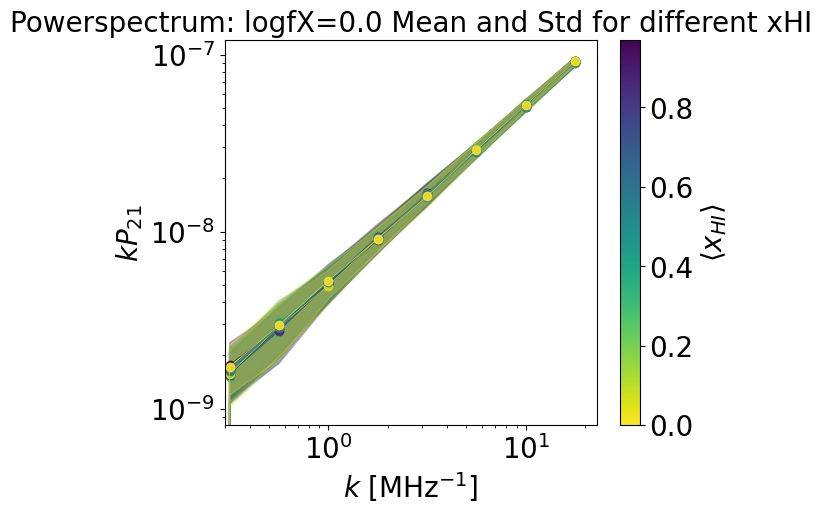

In [74]:
import glob
import numpy as np

filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"

files00 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX0.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps00 = np.zeros((len(files00), 32))
ps00std = np.zeros((len(files00), 32))
params00 = np.zeros((len(files00), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")

for i, file in enumerate(files00):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params00[i][0] = currxHI
    params00[i][1] = -1.0
    currps = np.loadtxt(file)
    currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps00[i, :] = currps_mean
    ps00std[i, :] = currps_std

#files0111 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
#ps0111 = np.loadtxt(files0111[0])
plot_power_spectra(ps00[:,:10], ps00std[:,:10], ks[:10], params00,  colorind=0, showplots=True, saveplots=True, label="Powerspectrum: logfX=0.0 Mean and Std for different xHI", markers=True, output_dir='tmp_out')
#plot_power_spectra(ps00[:,16:24], ps00std[:,16:24], ks[16:24], params00, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=0.0 Mean and Std for different xHI", markers=True)


min-max range: 0.0-1.0


<Figure size 500x500 with 0 Axes>

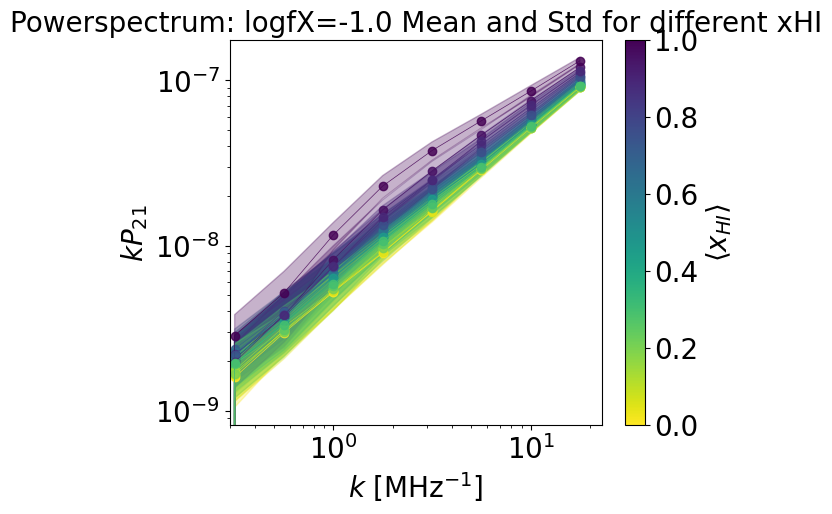

In [75]:
import glob
import numpy as np

filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"

files00 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps00 = np.zeros((len(files00), 32))
ps00std = np.zeros((len(files00), 32))
params00 = np.zeros((len(files00), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")

for i, file in enumerate(files00):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params00[i][0] = currxHI
    params00[i][1] = -1.0
    currps = np.loadtxt(file)
    currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps00[i, :] = currps_mean
    ps00std[i, :] = currps_std

#files0111 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
#ps0111 = np.loadtxt(files0111[0])
plot_power_spectra(ps00[:,:10], ps00std[:,:10], ks[:10], params00,  colorind=0, showplots=True, saveplots=True, label="Powerspectrum: logfX=-1.0 Mean and Std for different xHI", markers=True, output_dir='tmp_out')
#plot_power_spectra(ps00[:,16:24], ps00std[:,16:24], ks[16:24], params00, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=0.0 Mean and Std for different xHI", markers=True)


In [76]:
import glob
import numpy as np

#filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

filepath = "saved_output/train_test_psbs_dump/noisy/ps"

(paramsn, freqn, losn, psn, ksn) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noiseonly_21cmFAST_200Mpc_z6.0_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1000, limitsamplesize=None)

files20 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps20 = np.zeros((len(files20), 32))
ps20std = np.zeros((len(files20), 32))
params = np.zeros((len(files20), 2))
for i, file in enumerate(files20):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params[i][0] = currxHI
    params[i][1] = -1.0
    currps = np.loadtxt(file)
    currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps20[i, :] = currps_mean
    ps20std[i, :] = currps_std

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
plot_power_spectra(ps20[:,:16], ps20std[:,:16], ks[:16], params, psn=psn, colorind=0, showplots=True, saveplots=True, label=r"uGMRT 500h, log$_{10}(f_X)$=-2.0, Mean & 1$\sigma$", markers=True, output_dir="tmp_out")
plot_power_spectra(ps20[:,16:24], ps20std[:,16:24], ks[16:24], params, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=-2.0 Mean and Std for different xHI", markers=True)


\Loaded LoS data shape: (1, 2762)
Loaded data: parameters shape: (1, 2)


ValueError: too many values to unpack (expected 5)

min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

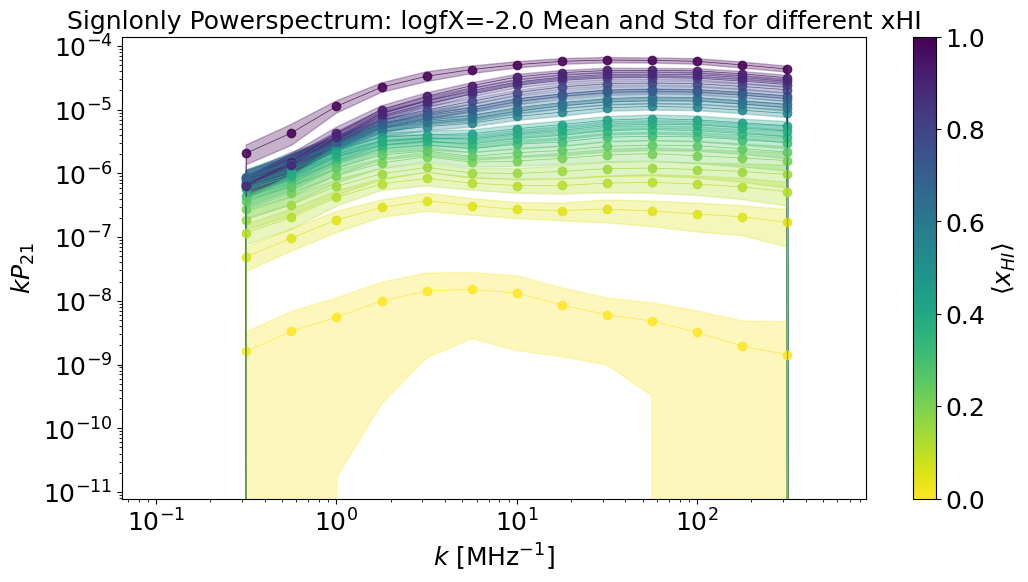

min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

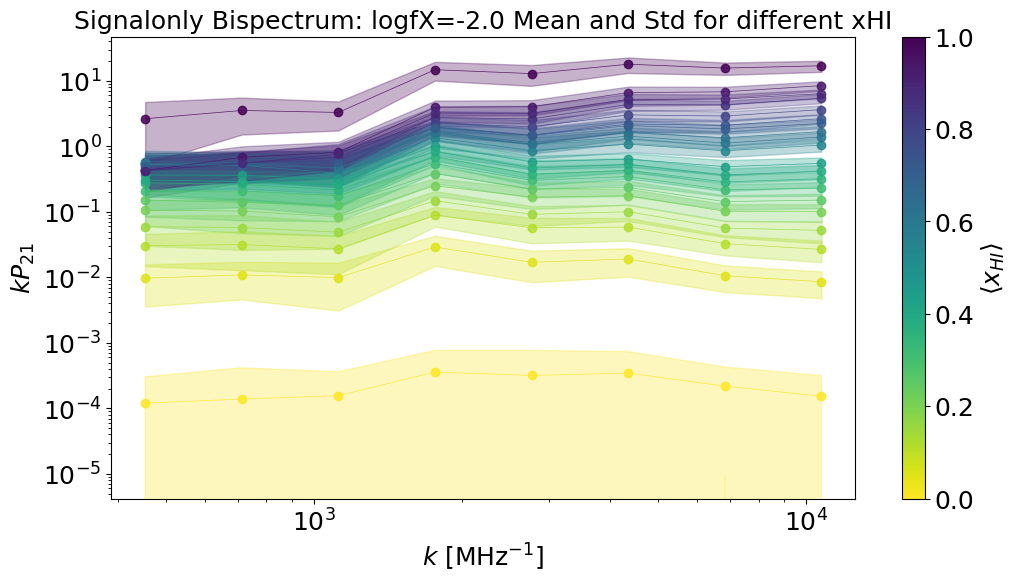

In [74]:
import glob
import numpy as np

#filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"
filepath = "saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/ps"

files20so = glob.glob(f"{filepath}/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI*.csv")
ps20so = np.zeros((len(files20so), 32))
ps20sostd = np.zeros((len(files20so), 32))
params20so = np.zeros((len(files20so), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")
for i, file in enumerate(files20so):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params20so[i][0] = currxHI
    params20so[i][1] = -1.0
    currps = np.loadtxt(file)
    #currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps20so[i, :] = currps_mean
    ps20sostd[i, :] = currps_std

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
plot_power_spectra(ps20so[:,:16], ps20sostd[:,:16], ks[:16], params20so, colorind=0, showplots=True, saveplots=False, label="Signlonly Powerspectrum: logfX=-2.0 Mean and Std for different xHI", markers=True)
plot_power_spectra(ps20so[:,16:24], ps20sostd[:,16:24], ks[16:24], params20so, colorind=0, showplots=True, saveplots=False, label="Signalonly Bispectrum: logfX=-2.0 Mean and Std for different xHI", markers=True)


min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

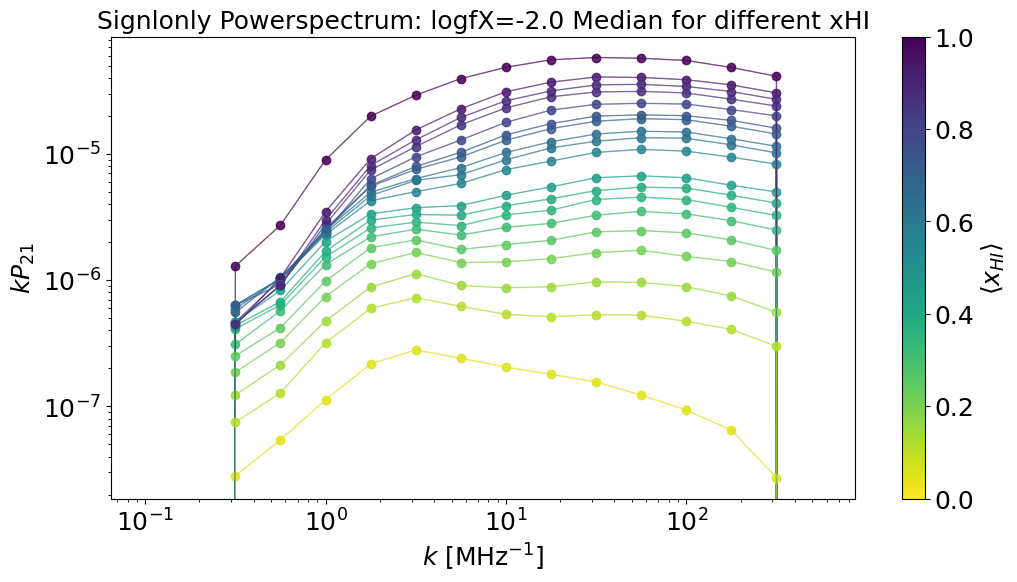

min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

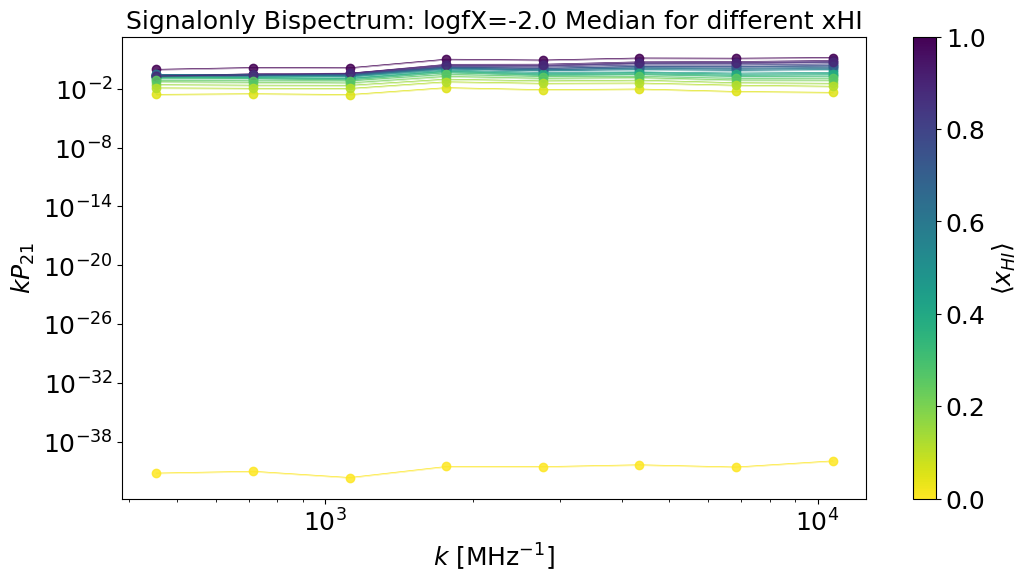

In [88]:
import glob
import numpy as np

#filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"
filepath = "saved_output/train_test_psbs_dump/so_median/f21_ps_dum_train_test_uGMRT_t500.0_20250401163206/ps"

files20so = glob.glob(f"{filepath}/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI*.csv")
ps20somed = np.zeros((len(files20so), 32))
ps20sostd = np.zeros((len(files20so), 32))
params20so = np.zeros((len(files20so), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")
for i, file in enumerate(files20so):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params20so[i][0] = currxHI
    params20so[i][1] = -1.0
    currps = np.loadtxt(file).reshape(-1, 32)
    #currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_median = np.median(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps20somed[i, :] = currps_median
    ps20sostd[i, :] = currps_std

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
plot_power_spectra(ps20somed[:,:16], ps20sostd[:,:16], ks[:16], params20so, colorind=0, showplots=True, saveplots=False, label="Signlonly Powerspectrum: logfX=-2.0 Median for different xHI", markers=True)
plot_power_spectra(ps20somed[:,16:24], ps20sostd[:,16:24], ks[16:24], params20so, colorind=0, showplots=True, saveplots=False, label="Signalonly Bispectrum: logfX=-2.0 Median for different xHI", markers=True)


20 files found
ks shape: (32,)
currps shape: (1, 32)
min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

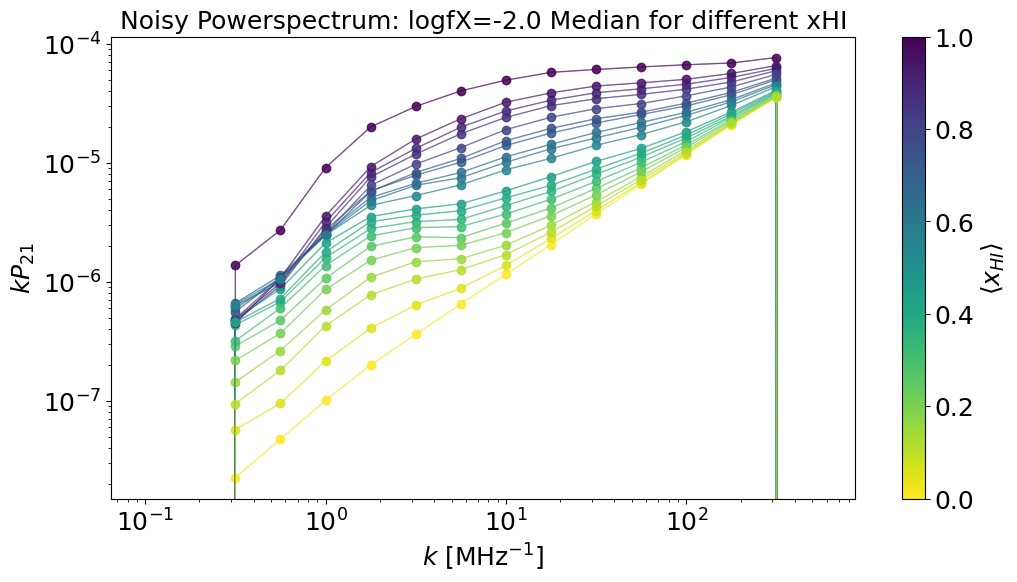

min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

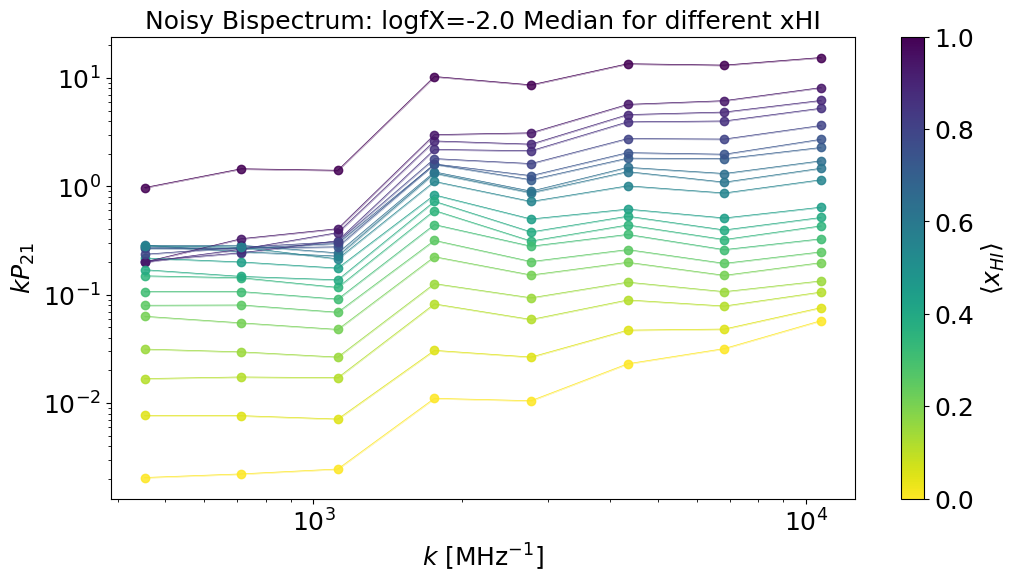

In [89]:
import glob
import numpy as np

#filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"
filepath = "saved_output/train_test_psbs_dump/noisy_median/f21_ps_dum_train_test_uGMRT_t500.0_20250401163347/ps"

files20nomed = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
print(f"{len(files20nomed)} files found")
ps20nomed = np.zeros((len(files20nomed), 32))
ps20nostd = np.zeros((len(files20nomed), 32))
params20nomed = np.zeros((len(files20nomed), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")
print(f"ks shape: {ks.shape}")
for i, file in enumerate(files20nomed):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params20nomed[i][0] = currxHI
    params20nomed[i][1] = -1.0
    currps = np.loadtxt(file).reshape(-1, 32)
    if i==0: print(f"currps shape: {currps.shape}")
    #currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_median = np.median(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps20nomed[i, :] = currps_median
    ps20nostd[i, :] = currps_std

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
plot_power_spectra(ps20nomed[:,:16], ps20nostd[:,:16], ks[:16], params20nomed, colorind=0, showplots=True, saveplots=False, label="Noisy Powerspectrum: logfX=-2.0 Median for different xHI", markers=True)
plot_power_spectra(ps20nomed[:,16:24], ps20nostd[:,16:24], ks[16:24], params20nomed, colorind=0, showplots=True, saveplots=False, label="Noisy Bispectrum: logfX=-2.0 Median for different xHI", markers=True)


20 files found
ks shape: (32,)
filename: saved_output/train_test_psbs_dump/noisy_mean/f21_ps_dum_train_test_uGMRT_t500.0_20250401163449/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.00_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv
currps shape: (1, 32)
min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

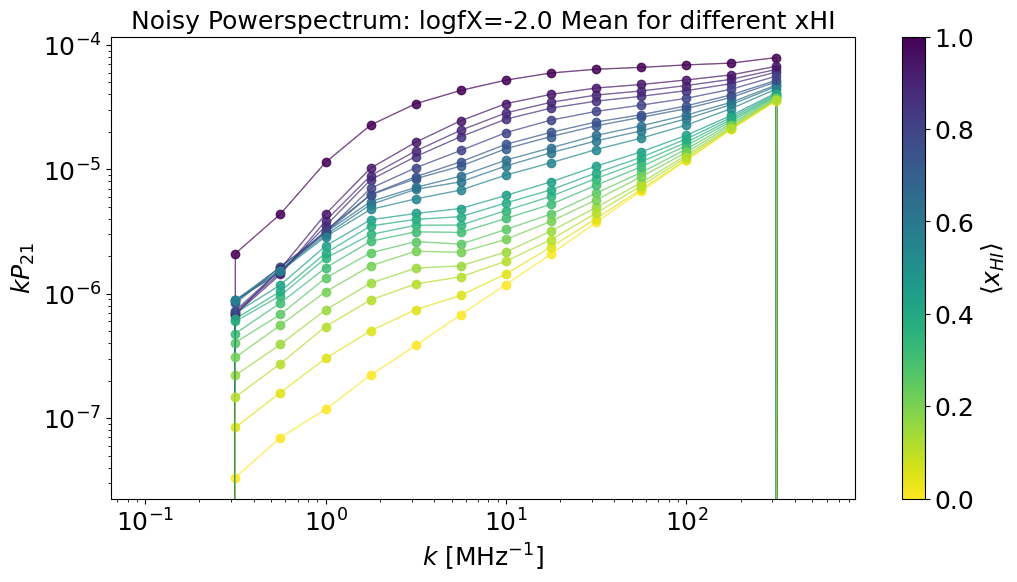

min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

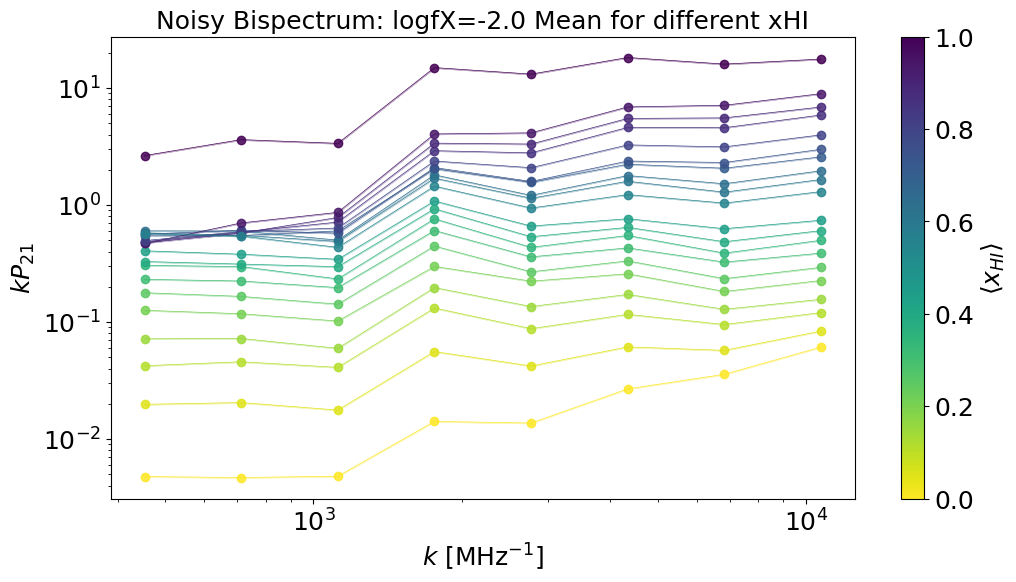

In [90]:
import glob
import numpy as np

#filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"
filepath = "saved_output/train_test_psbs_dump/noisy_mean/f21_ps_dum_train_test_uGMRT_t500.0_20250401163449/ps"

files20nomean = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
print(f"{len(files20nomean)} files found")
ps20nomean = np.zeros((len(files20nomean), 32))
ps20nostd = np.zeros((len(files20nomean), 32))
params20nomean = np.zeros((len(files20nomean), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")
print(f"ks shape: {ks.shape}")
for i, file in enumerate(files20nomean):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params20nomean[i][0] = currxHI
    params20nomean[i][1] = -1.0
    currps = np.loadtxt(file).reshape(-1, 32)
    if i==0: 
        print(f"filename: {file}")
        print(f"currps shape: {currps.shape}")
    #currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps20nomean[i, :] = currps_mean
    ps20nostd[i, :] = currps_std

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
plot_power_spectra(ps20nomean[:,:16], ps20nostd[:,:16], ks[:16], params20nomean, colorind=0, showplots=True, saveplots=False, label="Noisy Powerspectrum: logfX=-2.0 Mean for different xHI", markers=True)
plot_power_spectra(ps20nomean[:,16:24], ps20nostd[:,16:24], ks[16:24], params20nomean, colorind=0, showplots=True, saveplots=False, label="Noisy Bispectrum: logfX=-2.0 Mean for different xHI", markers=True)


min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

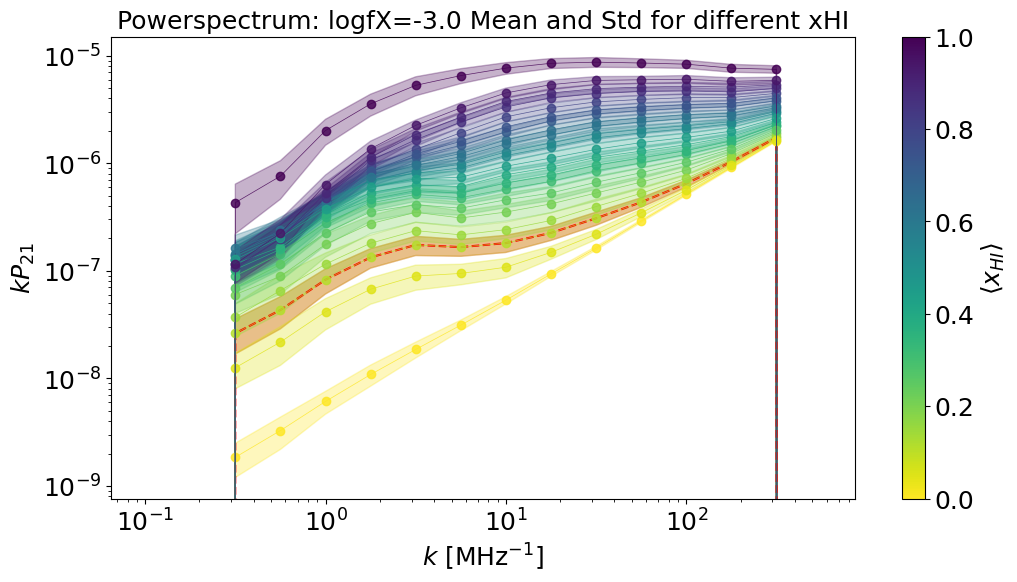

min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

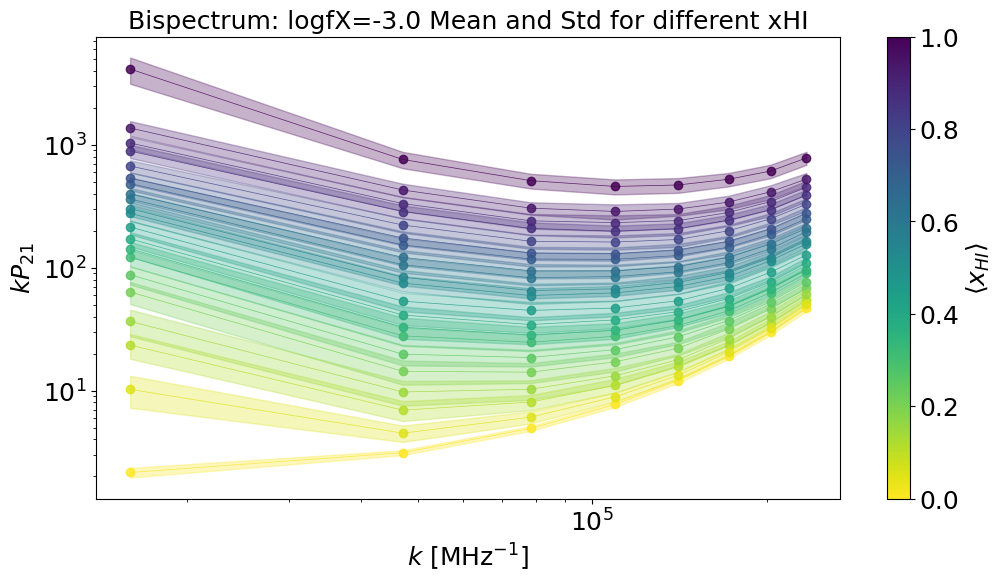

In [81]:
import glob
import numpy as np

filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"


files30 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps30 = np.zeros((len(files30), 32))
ps30std = np.zeros((len(files30), 32))
params = np.zeros((len(files30), 2))
for i, file in enumerate(files30):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params[i][0] = currxHI
    params[i][1] = -1.0
    currps = np.loadtxt(file)
    currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps30[i, :] = currps_mean
    ps30std[i, :] = currps_std

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
files0113 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps0113 = np.loadtxt(files0113[0])
plot_power_spectra(ps30[:,:16], ps30std[:,:16], ks[:16], params, ps0113[:,:16]*ks[:16]*1e6, colorind=0, showplots=True, saveplots=False, label="Powerspectrum: logfX=-3.0 Mean and Std for different xHI", markers=True)
plot_power_spectra(ps30[:,16:24], ps30std[:,16:24], ks[16:24], params, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=-3.0 Mean and Std for different xHI", markers=True)


min-max range: -4.0-1.0


<Figure size 1200x600 with 0 Axes>

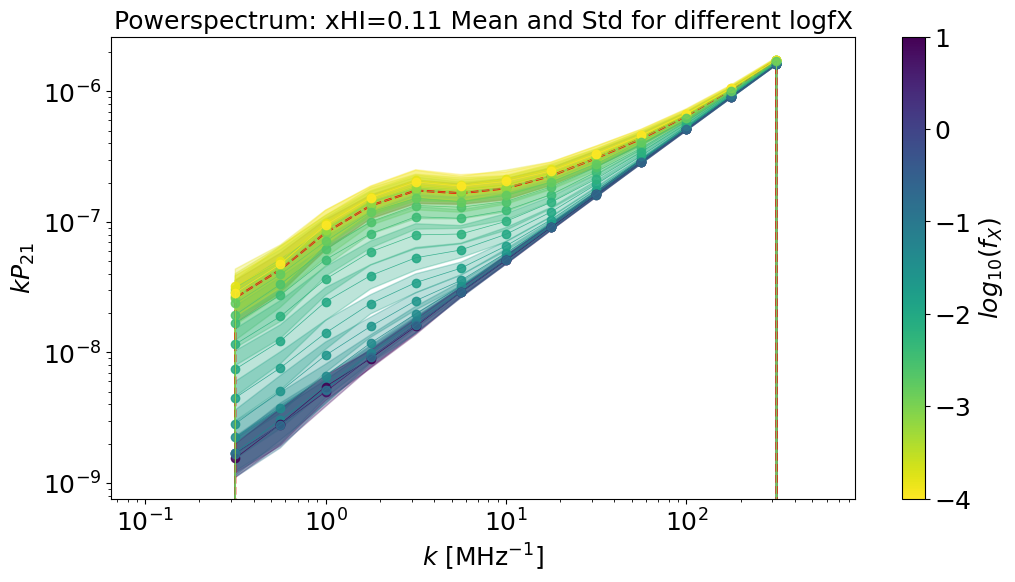

min-max range: -4.0-1.0


<Figure size 1200x600 with 0 Axes>

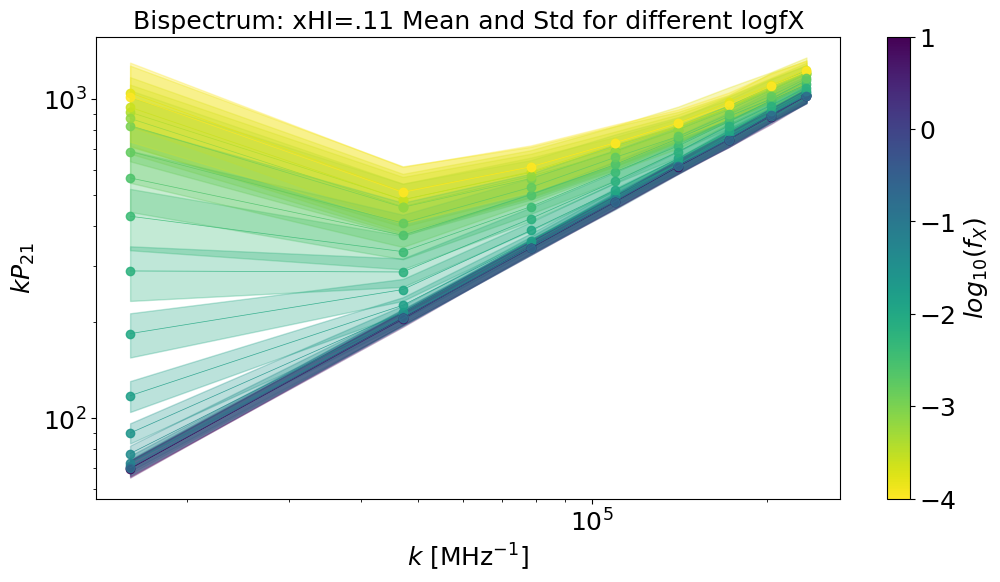

In [77]:
import glob
import numpy as np

filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

#filepath = "saved_output/train_test_psbs_dump/ps"




files011 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX*_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps011 = np.zeros((len(files011), 32))
ps011std = np.zeros((len(files011), 32))
params011 = np.zeros((len(files011), 2))
ks = np.loadtxt(f"{filepath}/ks_bin.csv")
for i, file in enumerate(files011):
    currfX = float(file.split('fX')[1].split('_')[0])
    params011[i][0] = 0.11
    params011[i][1] = currfX
    currps = np.loadtxt(file)
    currps = currps * ks *1e6
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps011[i, :] = currps_mean
    ps011std[i, :] = currps_std

files0113 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-3.00_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps0113 = np.loadtxt(files0113[0])
plot_power_spectra(ps011[:,:16], ps011std[:,:16], ks[:16], params011, ps0113[:,:16]*ks[:16]*1e6, colorind=1, showplots=True, saveplots=False, label="Powerspectrum: xHI=0.11 Mean and Std for different logfX", markers=True)
plot_power_spectra(ps011[:,16:24], ps011std[:,16:24], ks[16:24], params011, colorind=1, showplots=True, saveplots=False, label="Bispectrum: xHI=.11 Mean and Std for different logfX", markers=True)


In [115]:
def plot_power_spectra_comb(ps_data, ks, params, psn=None, colorind=1, output_dir=".", showplots=False, saveplots=True, labels=[], scale='log', markers=False):
    #logger.info(f'shapes ps:{ps.shape} ks:{ks.shape}')
    base.initplt()
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    # plot the noise
    for ax in axes:
        if psn is not None: 
            #for i in range(psn.shape[0]):
            #    ax.scatter(ks[0,1:]*1e6, psn[i, 1:], c='red',alpha=0.1)
            # Calculate mean and standard deviation of psn
            psn_mean = np.mean(psn[:,1:], axis=0)
            psn_std = np.std(psn[:,1:], axis=0)

            # Plot the mean as a dotted red line
            ax.plot(ks[1:]*1e6, psn_mean, color='red', linestyle='--', alpha=1, label='Noise')

            # Add the shaded region for 1 standard deviation
            ax.fill_between(ks[1:] * 1e6, psn_mean - psn_std, psn_mean + psn_std, color='red', alpha=0.3, label='Noise 1 Std Dev')
            #ax.fill_between(ks * 1e6, psn_mean - 2*psn_std, psn_mean + 2*psn_std, color='red', alpha=0.1, label='Noise 2 Std Dev')

    logging.info(params[0:2])
    coloraxs = params[:,colorind]
    mincoloraxs = min(coloraxs)
    maxcoloraxs = max(coloraxs)
    print(f"min-max range: {mincoloraxs}-{maxcoloraxs}")
    if markers: marker='o' 
    else: marker = None

    sm = plt.cm.ScalarMappable(cmap=colormaps[colorind], norm=clr.Normalize(vmin=mincoloraxs, vmax=maxcoloraxs))

    for x, (ps, psstd) in enumerate(ps_data):
        print(f"Plotting ps {x}, {ps.shape} {psstd.shape}")
        ax = axes[x]
        ax.set_title(labels[x])
        # Customize tick appearance
        
        # Enable minor ticks
        ax.minorticks_on()

        # Customize major ticks
        ax.tick_params(
            which='major',
            direction='in',
            length=10,
            width=1,
            #labelsize=12,
            top=True,
            bottom=True,
            left=True,
            right=True
        )

        # Customize minor ticks
        ax.tick_params(
            which='minor',
            direction='in',
            length=5,
            width=1,
            top=True,
            bottom=True,
            left=True,
            right=True
        )
        if scale == 'log': 
            ax.set_xscale('log')
            ax.set_yscale('log')
        alpha = base.decide_alpha(len(ps))
        ax.set_xlim(left=0.3)
        for i, (row_ps, row_psstd, row_coloraxs) in enumerate(zip(ps, psstd, coloraxs)):
            color=sm.to_rgba(row_coloraxs)
            #if i%1000==0: print(f"color mapping: {row_coloraxs} : {color}")
            ax.plot(ks*1e6, row_ps, linewidth=1, color=color, alpha=alpha, marker= None)
            #print(f"shape of row_ps = {row_ps.shape}, shape of row_psstd = {row_psstd.shape}, shape of ks = {ks.shape}")
            ax.fill_between(ks * 1e6, row_ps - row_psstd, row_ps + row_psstd, color=color, alpha=0.3)
            #ax.set_yscale('log')
            #if i> 10: break
            # Plot noise curve

        #plt.legend()
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        
    axes[1].set_xlabel(r"$k$ [MHz$^{-1}$]")
    axes[0].set_ylabel("$kP_{21}$")

    #plt.tight_layout()
    fig.subplots_adjust(right=0.87, wspace=0.02, hspace=0)

    cbar_ax = fig.add_axes([0.88, 0.11, 0.02, 0.77])  # [left, bottom, width, height]
    cbar = plt.colorbar(sm, cax=cbar_ax, label=colorlabels[colorind])

    
    if saveplots: plt.savefig(f"{output_dir}/power_spectra_combined.pdf", format="pdf", bbox_inches='tight')
    if showplots: plt.show()
    plt.close()


Loading data from 20 files for fx=0.0
Loading data from 21 files for fx=-1.0
Loading data from 21 files for fx=-2.0
min-max range: 0.0-0.97
Plotting ps 0, (21, 16) (21, 16)
Plotting ps 1, (21, 16) (21, 16)
Plotting ps 2, (20, 16) (20, 16)


<Figure size 500x500 with 0 Axes>

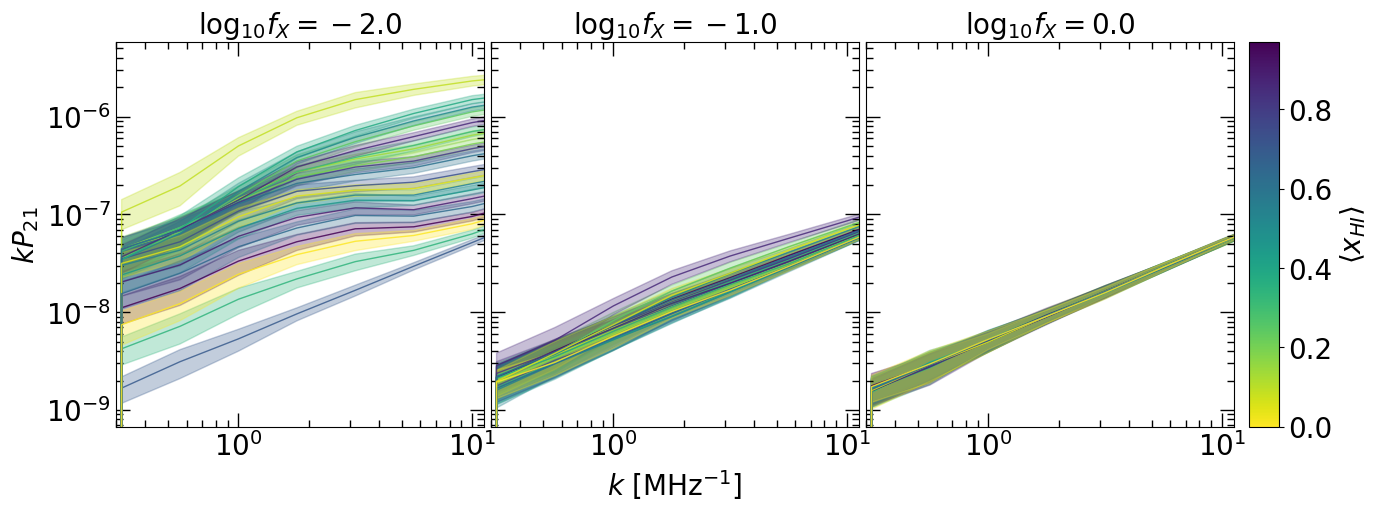

In [116]:
import glob
import numpy as np
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import f21_predict_base as base
import plot_results as pltr
import importlib
import logging
import numpy as np
import F21DataLoader as dl
import F21Stats as f21stats
importlib.reload(base)
importlib.reload(dl)
importlib.reload(f21stats)
def load(fX):
    filepath = "output/f21_ps_dum_train_test_uGMRT_t500_20250325105433/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv

    files10 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX{fX:.2f}_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
    print(f"Loading data from {len(files10)} files for fx={fX}")
    ps10 = np.zeros((len(files10), 32))
    ps10std = np.zeros((len(files10), 32))
    params = np.zeros((len(files10), 2))
    ks = np.loadtxt(f"{filepath}/ks_bin.csv")

    for i, file in enumerate(files10):
        currxHI = float(file.split('xHI')[1].split('_')[0])
        params[i][0] = currxHI
        params[i][1] = -1.0
        currps = np.loadtxt(file)
        currps = currps * ks *1e6
        #print(f"shape of currps={currps.shape}")
        currps_mean = np.mean(currps, axis=0)
        currps_std = np.std(currps, axis=0)
        ps10[i, :] = currps_mean
        ps10std[i, :] = currps_std
        #print(f"psstd shape = {ps10std.shape}")
    return ps10, ps10std, ks, params
#filepath = "saved_output/train_test_psbs_dump/ps"

ps00, ps00std, ks, params = load(0.00)
ps10, ps10std, _, _ = load(-1.00)
ps20, ps20std, _, _ = load(-2.00)

plot_power_spectra_comb([(ps20[:,:16], ps20std[:,:16]),(ps10[:,:16], ps10std[:,:16]),(ps00[:,:16], ps00std[:,:16])], ks[:16], params, colorind=0, showplots=True, saveplots=True, labels=[r"log$_{10}f_X=-2.0$",r"log$_{10}f_X=-1.0$",r"log$_{10}f_X=0.0$"], markers=True, output_dir='tmp_out')
#plot_power_spectra(ps10[:,16:24], ps10std[:,16:24], ks[16:24], params, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=-1.0 Mean and Std for different xHI", markers=True)
